# Load data from Lakehouse

In [73]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
from PIL import Image
from scipy.stats import skew
from matplotlib.transforms import Bbox
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("/lakehouse/default/Files/SAML-D.csv")


StatementMeta(, 282a952f-3f97-403e-9add-9426071d4c69, 75, Finished, Available, Finished)

# Exploratory Data analysis

In [3]:
print(df)

StatementMeta(, 282a952f-3f97-403e-9add-9426071d4c69, 5, Finished, Available, Finished)

             Time        Date  Sender_account  Receiver_account    Amount  \
0        10:35:19  2022-10-07      8724731955        2769355426   1459.15   
1        10:35:20  2022-10-07      1491989064        8401255335   6019.64   
2        10:35:20  2022-10-07       287305149        4404767002  14328.44   
3        10:35:21  2022-10-07      5376652437        9600420220  11895.00   
4        10:35:21  2022-10-07      9614186178        3803336972    115.25   
...           ...         ...             ...               ...       ...   
9504847  10:57:01  2023-08-23      2453933570         519744068   2247.25   
9504848  10:57:06  2023-08-23      9805510177        5416607878    927.18   
9504849  10:57:06  2023-08-23      7282330957        2995527149   1455.14   
9504850  10:57:11  2023-08-23       940337377        4812815165  25995.70   
9504851  10:57:12  2023-08-23       105185176        6824994831   9586.08   

        Payment_currency Received_currency Sender_bank_location  \
0       

In [4]:
# check for duplicates
df = df.drop_duplicates(keep = 'first')
df.shape

StatementMeta(, 282a952f-3f97-403e-9add-9426071d4c69, 6, Finished, Available, Finished)

(9504852, 12)

In [5]:
# checking if there are null values in the dataset
df.notnull()

StatementMeta(, 282a952f-3f97-403e-9add-9426071d4c69, 7, Finished, Available, Finished)

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,True,True,True,True,True,True,True,True,True,True,True,True
9504848,True,True,True,True,True,True,True,True,True,True,True,True
9504849,True,True,True,True,True,True,True,True,True,True,True,True
9504850,True,True,True,True,True,True,True,True,True,True,True,True


In [6]:
#showing all nulls per column
print(df.isna().sum())

StatementMeta(, 282a952f-3f97-403e-9add-9426071d4c69, 8, Finished, Available, Finished)

Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
Laundering_type           0
dtype: int64


In [7]:
#provides information about the number of rows and columns
df.shape

StatementMeta(, 282a952f-3f97-403e-9add-9426071d4c69, 9, Finished, Available, Finished)

(9504852, 12)

In [8]:
df.head(2)

StatementMeta(, 282a952f-3f97-403e-9add-9426071d4c69, 10, Finished, Available, Finished)

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out


In [21]:
#checking duplicates in the dataset
duplicates = df[df.duplicated()]

print(duplicates)

StatementMeta(, 282a952f-3f97-403e-9add-9426071d4c69, 23, Finished, Available, Finished)

Empty DataFrame
Columns: [Time, Date, Sender_account, Receiver_account, Amount, Payment_currency, Received_currency, Sender_bank_location, Receiver_bank_location, Payment_type, Is_laundering, Laundering_type]
Index: []


In [9]:
# number of transactions per payment type
transactions_per_payment_type = df['Payment_type'].value_counts()

transactions_per_payment_type

StatementMeta(, 282a952f-3f97-403e-9add-9426071d4c69, 11, Finished, Available, Finished)

Payment_type
Credit card        2012909
Debit card         2012103
Cheque             2011419
ACH                2008807
Cross-border        933931
Cash Withdrawal     300477
Cash Deposit        225206
Name: count, dtype: int64

In [10]:
# number of transactions per payment type
transactions_per_laundering_type = df['Laundering_type'].value_counts()

transactions_per_laundering_type

StatementMeta(, 282a952f-3f97-403e-9add-9426071d4c69, 12, Finished, Available, Finished)

Laundering_type
Normal_Small_Fan_Out      3477717
Normal_Fan_Out            2302220
Normal_Fan_In             2104285
Normal_Group               528351
Normal_Cash_Withdrawal     305031
Normal_Cash_Deposits       223801
Normal_Periodical          210526
Normal_Plus_Mutual         155041
Normal_Mutual              125335
Normal_Foward               42031
Normal_single_large         20641
Structuring                  1870
Cash_Withdrawal              1334
Deposit-Send                  945
Smurfing                      932
Layered_Fan_In                656
Layered_Fan_Out               529
Stacked Bipartite             506
Behavioural_Change_1          394
Bipartite                     383
Cycle                         382
Fan_In                        364
Gather-Scatter                354
Behavioural_Change_2          345
Scatter-Gather                338
Single_large                  250
Fan_Out                       237
Over-Invoicing                 54
Name: count, dtype: int64

In [11]:
df.head(3)

StatementMeta(, 282a952f-3f97-403e-9add-9426071d4c69, 13, Finished, Available, Finished)

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out


In [22]:
# viewing datatype of the dataset
print("\nData types:")
print(df.dtypes)

StatementMeta(, 282a952f-3f97-403e-9add-9426071d4c69, 24, Finished, Available, Finished)


Data types:
Time                       object
Date                       object
Sender_account              int64
Receiver_account            int64
Amount                    float64
Payment_currency           object
Received_currency          object
Sender_bank_location       object
Receiver_bank_location     object
Payment_type               object
Is_laundering               int64
Laundering_type            object
dtype: object


In [23]:
#convert the Time to datetime format

df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
df.dtypes

StatementMeta(, 282a952f-3f97-403e-9add-9426071d4c69, 25, Finished, Available, Finished)

Time                      datetime64[ns]
Date                              object
Sender_account                     int64
Receiver_account                   int64
Amount                           float64
Payment_currency                  object
Received_currency                 object
Sender_bank_location              object
Receiver_bank_location            object
Payment_type                      object
Is_laundering                      int64
Laundering_type                   object
dtype: object

In [25]:
#convert the Date to datetime

df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

StatementMeta(, 282a952f-3f97-403e-9add-9426071d4c69, 27, Finished, Available, Finished)

Time                      datetime64[ns]
Date                      datetime64[ns]
Sender_account                     int64
Receiver_account                   int64
Amount                           float64
Payment_currency                  object
Received_currency                 object
Sender_bank_location              object
Receiver_bank_location            object
Payment_type                      object
Is_laundering                      int64
Laundering_type                   object
dtype: object

In [26]:
# Extract year and month from the 'Date' column and create a new column
df['Year_Month'] = pd.to_datetime(df['Date']).dt.to_period('M')

StatementMeta(, 282a952f-3f97-403e-9add-9426071d4c69, 28, Finished, Available, Finished)

In [28]:
df.head(2)

StatementMeta(, 282a952f-3f97-403e-9add-9426071d4c69, 30, Finished, Available, Finished)

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type,Year_Month
0,1900-01-01 10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits,2022-10
1,1900-01-01 10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out,2022-10


StatementMeta(, 282a952f-3f97-403e-9add-9426071d4c69, 57, Finished, Available, Finished)

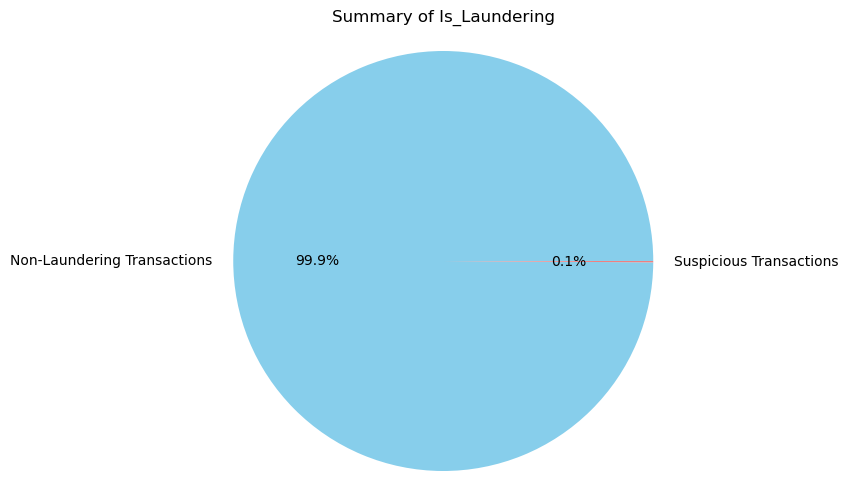

In [55]:
class_distribution = df['Is_laundering'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(class_distribution, labels=['Non-Laundering Transactions', 'Suspicious Transactions'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])

plt.title('Summary of Is_Laundering')
plt.axis('equal')

plt.show()

StatementMeta(, 282a952f-3f97-403e-9add-9426071d4c69, 34, Finished, Available, Finished)

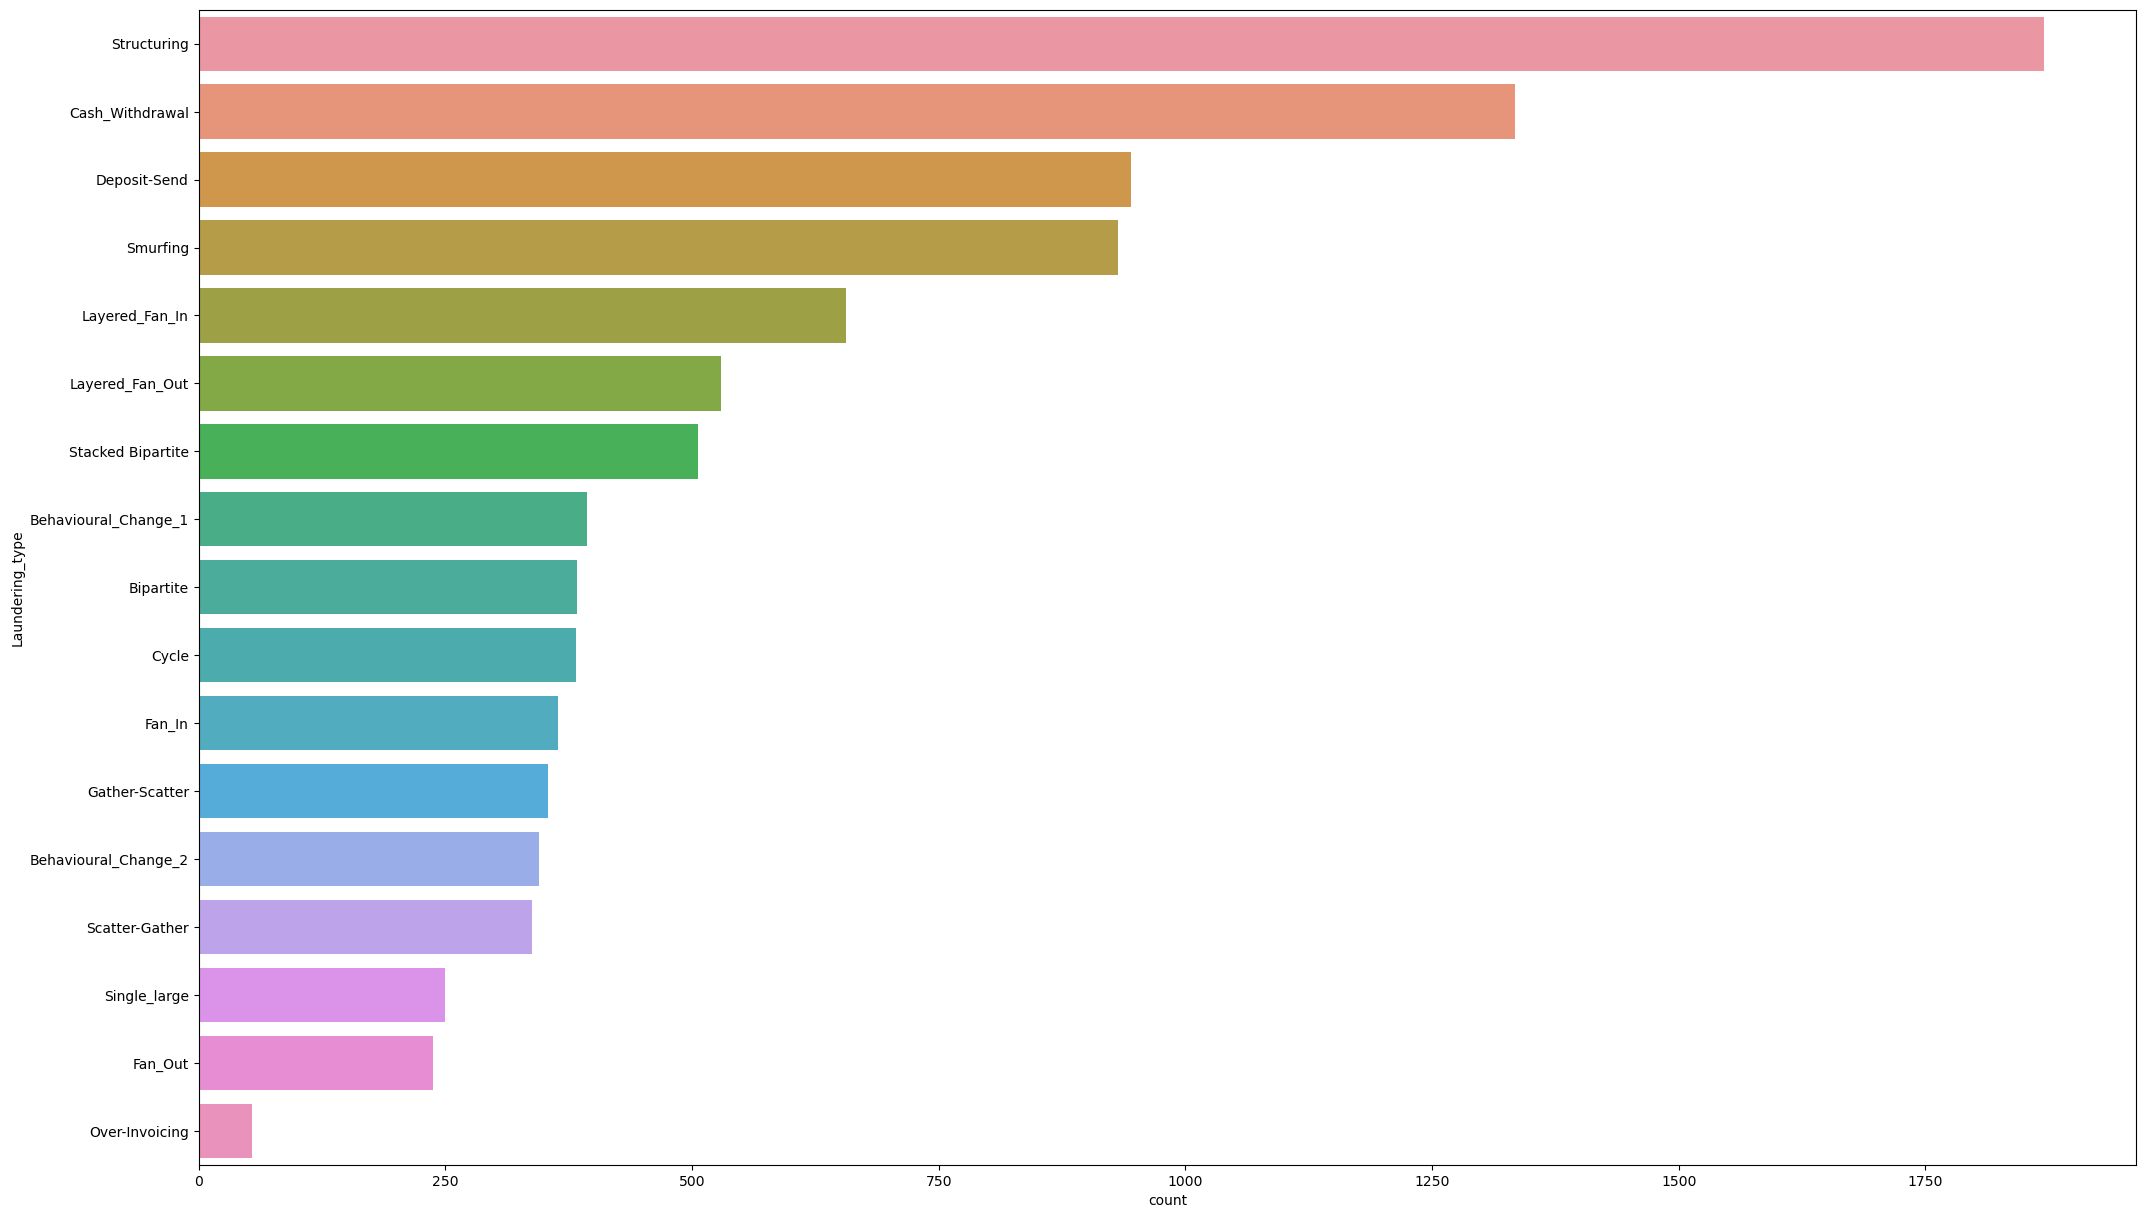

In [32]:
# checking type of most frequent fraud transactions
plt.figure(figsize=(25, 15))
laundering_counts = df[df['Is_laundering'] == 1]['Laundering_type'].value_counts()
sns.countplot(data=df[df['Is_laundering'] == 1], y='Laundering_type', order=laundering_counts.index)
plt.show();

In [39]:
# df['Year_Month'] = df[df['Is_laundering'] == 1]['Date'].dt.to_period('M')

# display stats of laundering type and their portion of monthly total laundering cases
from matplotlib.cm import get_cmap
plt.figure(figsize=(20, 10))

laundering_counts = df[df['Is_laundering'] == 1].groupby(['Year_Month', 'Laundering_type']).size().unstack(fill_value=0)
laundering_counts.plot(kind='bar', stacked=True, color=sns.color_palette('tab20', df['Laundering_type'].nunique()))
plt.title('Summary of Is_Laundering by Year-Month and Laundering Type')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Laundering Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show();

StatementMeta(, 282a952f-3f97-403e-9add-9426071d4c69, 41, Finished, Available, Finished)

KeyError: 'Year_Month'

StatementMeta(, 282a952f-3f97-403e-9add-9426071d4c69, 51, Finished, Available, Finished)

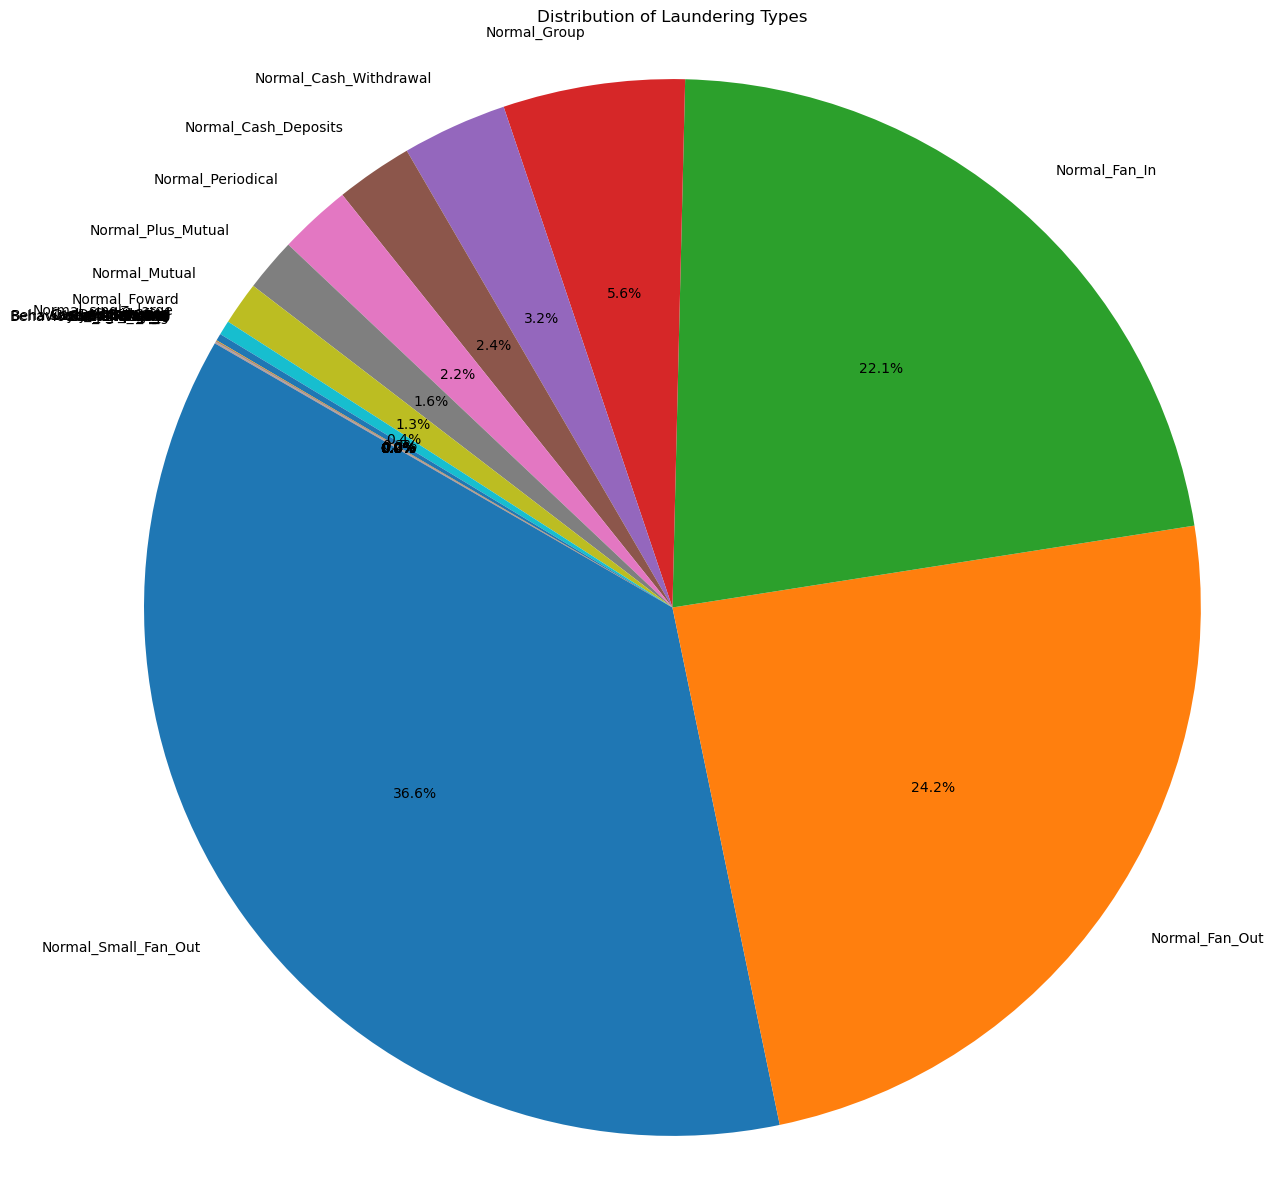

In [49]:
plt.figure(figsize=(15, 15))
laundering_counts = df['Laundering_type'].value_counts()
plt.pie(laundering_counts, labels=laundering_counts.index, autopct='%2.1f%%', startangle=150)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Laundering Types')
plt.show();

StatementMeta(, 282a952f-3f97-403e-9add-9426071d4c69, 55, Finished, Available, Finished)

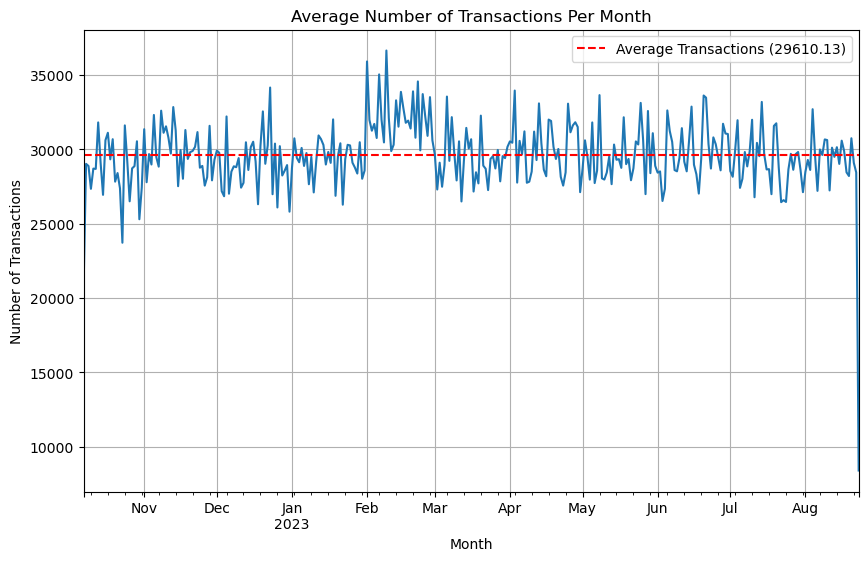

In [53]:
df['Date'] = pd.to_datetime(df['Date'])
monthly_transactions = df.groupby(df['Date'].dt.to_period('D')).size()

# number of transactions per month
average_monthly_transactions = monthly_transactions.mean()

plt.figure(figsize=(10, 6))
monthly_transactions.plot(kind='line')
plt.axhline(y=average_monthly_transactions, color='r', linestyle='--', label=f'Average Transactions ({average_monthly_transactions:.2f})')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Average Number of Transactions Per Month')
plt.legend()
plt.grid(True)
plt.show()

StatementMeta(, 282a952f-3f97-403e-9add-9426071d4c69, 58, Finished, Available, Finished)

Text(0.5, 0, 'Number of Alerts')

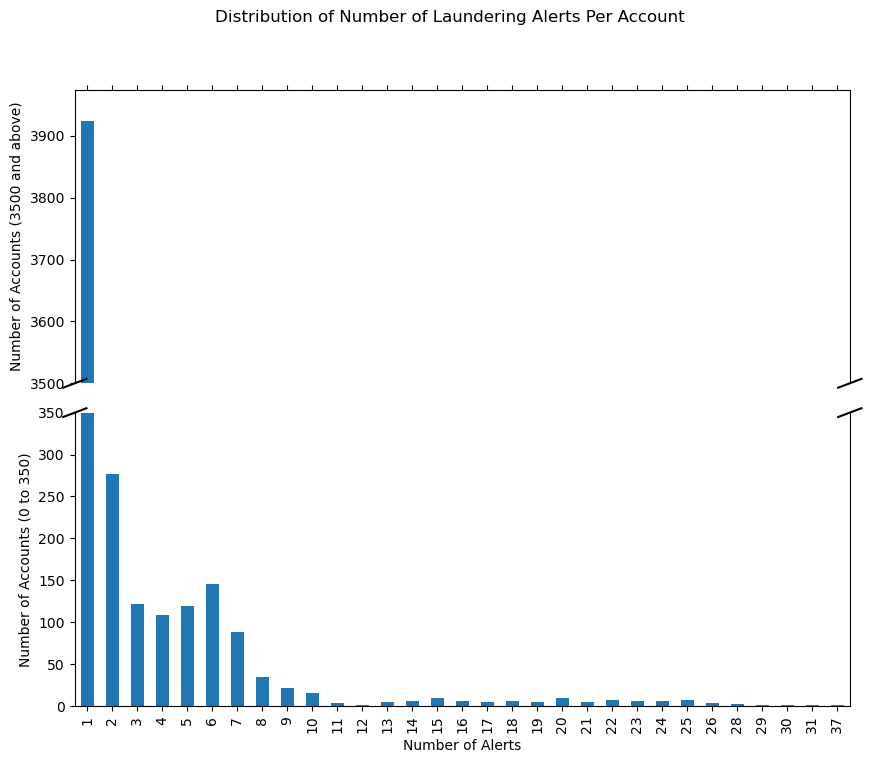

In [56]:
laundering_df = df[df['Is_laundering'] == 1]

account_alert_counts = laundering_df.groupby('Sender_account').size()
alert_distribution = account_alert_counts.value_counts()
alert_distribution = alert_distribution.sort_index()

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
fig.subplots_adjust(hspace=0.1)

alert_distribution.plot(kind='bar', ax=ax1)
alert_distribution.plot(kind='bar', ax=ax2)

fig.suptitle('Distribution of Number of Laundering Alerts Per Account')

ax1.set_ylim(3500, alert_distribution.max()+50)
ax2.set_ylim(0, 350)

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

d = .015  # diagonal lines size
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

ax2.set_ylabel('Number of Accounts (0 to 350)')
ax1.set_ylabel('Number of Accounts (3500 and above)')
ax2.set_xlabel('Number of Alerts')

In [57]:
total_amount_pivot = pd.pivot_table(df, index=["Payment_type"], values='Amount', aggfunc=np.sum)
laundering_count_pivot = df[df['Is_laundering'] == 1].groupby('Payment_type').size().to_frame('Laundering_Count')
normal_count_pivot = df[df['Is_laundering'] == 0].groupby('Payment_type').size().to_frame('Normal_Count')

combined_pivot = total_amount_pivot.join([laundering_count_pivot, normal_count_pivot], how='outer')
combined_pivot = combined_pivot.fillna(0)

cm = sns.light_palette("blue", as_cmap=True)
styled_combined_pivot = combined_pivot.style.background_gradient(cmap=cm)

styled_combined_pivot

StatementMeta(, 282a952f-3f97-403e-9add-9426071d4c69, 59, Finished, Available, Finished)

,Amount,Laundering_Count,Normal_Count
Payment_type,,,
ACH,18272052011.854218,1159,2007648
Cash Deposit,485809045.640000,1405,223801
Cash Withdrawal,46118125.580000,1334,299143
Cheque,18328875956.816402,1087,2010332
Credit card,18308924931.183823,1136,2011773
Cross-border,9476591292.695444,2628,931303
Debit card,18372338763.838520,1124,2010979


StatementMeta(, 282a952f-3f97-403e-9add-9426071d4c69, 63, Finished, Available, Finished)

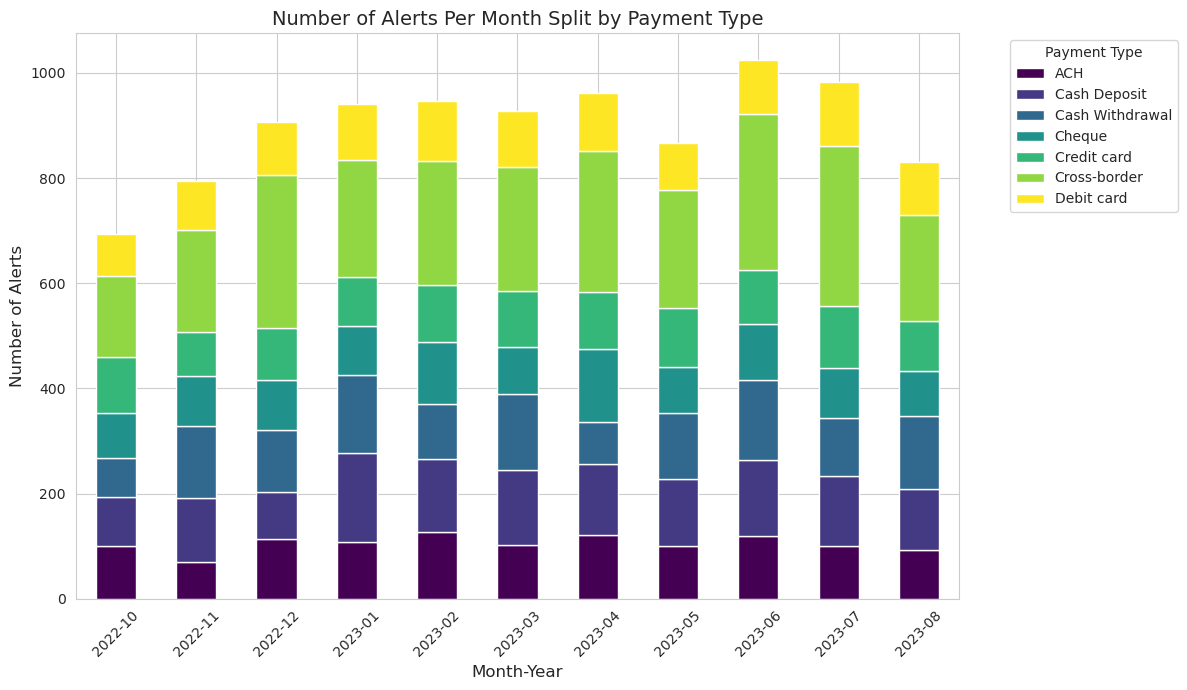

In [61]:
df['Date'] = pd.to_datetime(df['Date'])
grouped_data = df.groupby(['Date', 'Payment_type']).agg({'Is_laundering': 'sum'}).reset_index()
grouped_data['Month_Year'] = grouped_data['Date'].dt.to_period('M')
monthly_alerts = grouped_data.groupby(['Month_Year', 'Payment_type']).agg({'Is_laundering': 'sum'}).reset_index()

pivot_data = monthly_alerts.pivot(index='Month_Year', columns='Payment_type', values='Is_laundering')

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 7))
pivot_data.plot(kind='bar', ax=ax, stacked=True, colormap='viridis')
pivot_data = monthly_alerts.pivot(index='Month_Year', columns='Payment_type', values='Is_laundering')

plt.title('Number of Alerts Per Month Split by Payment Type', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Number of Alerts', fontsize=12)
plt.xticks(rotation=45)

plt.legend(title='Payment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

StatementMeta(, 282a952f-3f97-403e-9add-9426071d4c69, 64, Finished, Available, Finished)

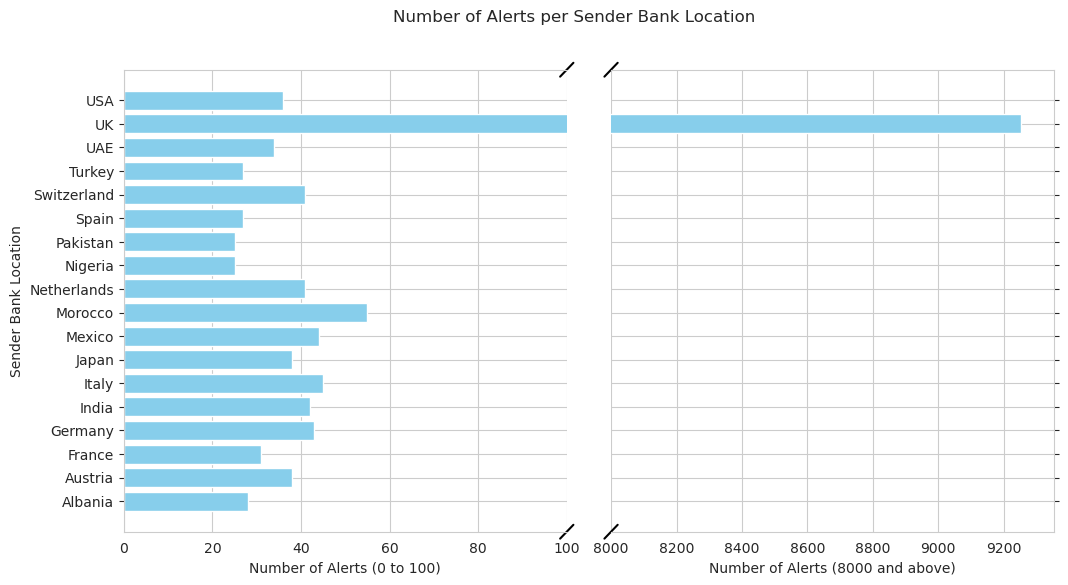

In [62]:
alerts_per_location = df.groupby('Sender_bank_location')['Is_laundering'].sum().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
fig.subplots_adjust(wspace=0.1)

ax1.barh(alerts_per_location['Sender_bank_location'], alerts_per_location['Is_laundering'], color='skyblue')
ax2.barh(alerts_per_location['Sender_bank_location'], alerts_per_location['Is_laundering'], color='skyblue')

ax1.set_xlim(0, 100)  # Set the left subplot values
ax2.set_xlim(8000, max(alerts_per_location['Is_laundering']) + 100)  # Set the right subplot values

fig.suptitle('Number of Alerts per Sender Bank Location')

ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.yaxis.tick_left()
ax2.yaxis.tick_right()
ax2.set_yticks([])

d = .015  # Size of diagonal lines
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (-d, +d), **kwargs)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)

ax1.set_xlabel('Number of Alerts (0 to 100)')
ax2.set_xlabel('Number of Alerts (8000 and above)')
ax1.set_ylabel('Sender Bank Location')

ax1.set_yticks(range(len(alerts_per_location['Sender_bank_location'])))
ax1.set_yticklabels(alerts_per_location['Sender_bank_location'])

plt.show()

StatementMeta(, 282a952f-3f97-403e-9add-9426071d4c69, 65, Finished, Available, Finished)

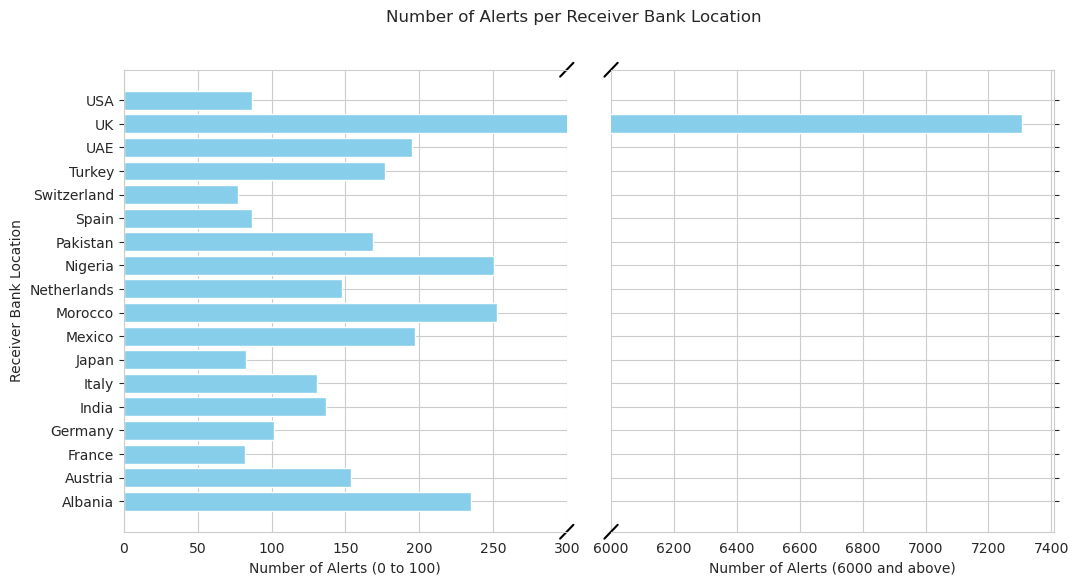

In [63]:
alerts_per_location = df.groupby('Receiver_bank_location')['Is_laundering'].sum().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
fig.subplots_adjust(wspace=0.1)  # Adjust the spacing between subplots

ax1.barh(alerts_per_location['Receiver_bank_location'], alerts_per_location['Is_laundering'], color='skyblue')
ax2.barh(alerts_per_location['Receiver_bank_location'], alerts_per_location['Is_laundering'], color='skyblue')

ax1.set_xlim(0, 300)  # Set the left subplot values
ax2.set_xlim(6000, max(alerts_per_location['Is_laundering']) + 100)  # Set the right subplot values

fig.suptitle('Number of Alerts per Receiver Bank Location')

ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.yaxis.tick_left()
ax2.yaxis.tick_right()
ax2.set_yticks([])

d = .015  # Size of diagonal lines
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (-d, +d), **kwargs)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)

ax1.set_xlabel('Number of Alerts (0 to 100)')
ax2.set_xlabel('Number of Alerts (6000 and above)')
ax1.set_ylabel('Receiver Bank Location')

ax1.set_yticks(range(len(alerts_per_location['Receiver_bank_location'])))
ax1.set_yticklabels(alerts_per_location['Receiver_bank_location'])

plt.show()

StatementMeta(, 282a952f-3f97-403e-9add-9426071d4c69, 67, Finished, Available, Finished)

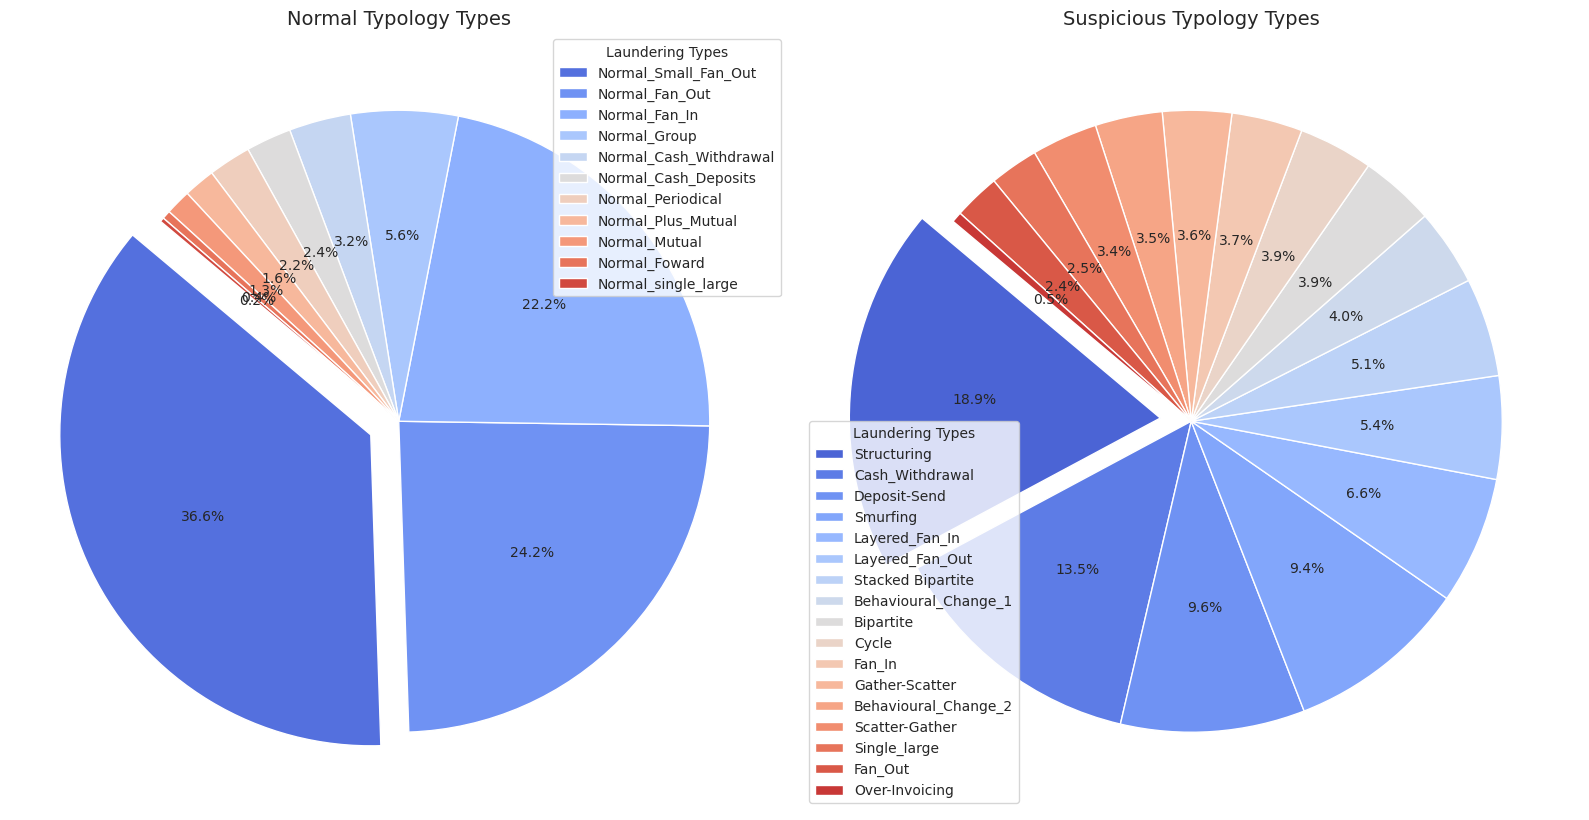

In [65]:
normal_data = df[df['Is_laundering'] == 0]['Laundering_type'].value_counts()
laundering_data = df[df['Is_laundering'] == 1]['Laundering_type'].value_counts()

# palette_normal = sns.color_palette("husl", len(normal_data))
palette_normal = sns.color_palette("coolwarm", len(normal_data))
palette_laundering = sns.color_palette("coolwarm", len(laundering_data))

fig, axs = plt.subplots(1, 2, figsize=(16, 10))

explode_normal = [0.1] + [0] * (len(normal_data) - 1)
explode_laundering = [0.1] + [0] * (len(laundering_data) - 1)

patches, texts, autotexts = axs[0].pie(normal_data, explode=explode_normal, autopct='%1.1f%%', colors=palette_normal, startangle=140)
axs[0].set_title('Normal Typology Types', fontsize=14)
axs[0].legend(patches, normal_data.index, loc='best', title="Laundering Types", fontsize=10)

patches, texts, autotexts = axs[1].pie(laundering_data, explode=explode_laundering, autopct='%1.1f%%', colors=palette_laundering, startangle=140)
axs[1].set_title('Suspicious Typology Types', fontsize=14)
axs[1].legend(patches, laundering_data.index, loc='best', title="Laundering Types", fontsize=10)

for text in texts + autotexts:
  text.set_fontsize(10)

plt.tight_layout()
plt.show()

StatementMeta(, 282a952f-3f97-403e-9add-9426071d4c69, 83, Finished, Available, Finished)

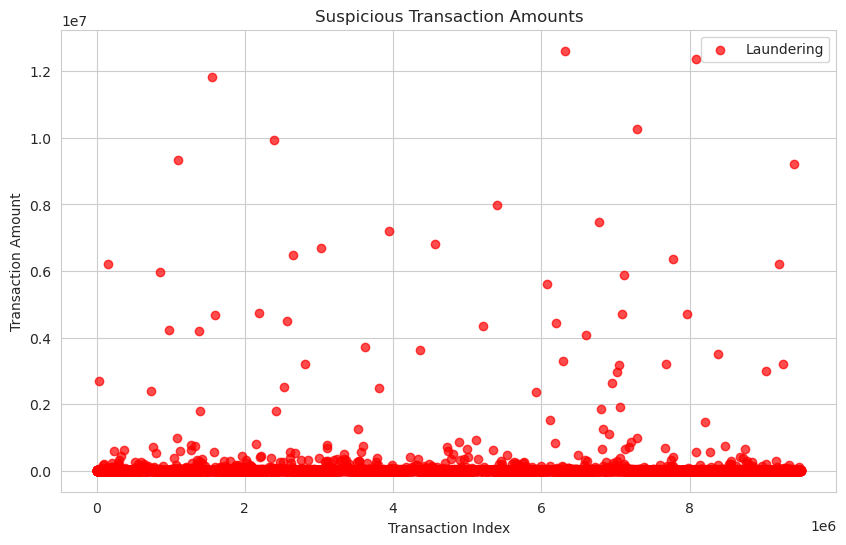

In [81]:
# Separate the data

laundering_data = df[df['Is_laundering'] == 1]
non_laundering_data = df[df['Is_laundering'] == 0]

plt.figure(figsize=(10, 6))
plt.scatter(laundering_data.index, laundering_data['Amount'], color='red', label='Laundering', alpha=0.7)

plt.title('Suspicious Transaction Amounts')
plt.xlabel('Transaction Index')
plt.ylabel('Transaction Amount')
plt.legend()
plt.grid(True)
plt.show();